<hr style="border:10px solid #B7AAA7"> </hr>
<h1>About Dataset</h1>
<p>Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.</p>
<p><ul>
    <li>Customers who left within the last month – the column is called Churn</li>
    <li>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies</li>
    <li>Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
    <li>Demographic info about customers – gender, age range, and if they have partners and dependents</li>
</ul></p>

<hr style="border:10px solid #B7AAA7"> </hr>
<h1>Importing packages</h1>

In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<hr style="border:10px solid #B8AAA7"> </hr>
<h1>Creating Dataframes</h1>

In [2]:
#creating dataframe
dataframe = pd.read_csv('Data/Customer_Churn.csv')

In [3]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataframe.shape

(7043, 21)

In [6]:
#checking columns in dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<hr style="border:10px solid #B8AAA7"> </hr>
<h1>Modifying Dataframes</h1>

In [7]:
#Dropping unrequired columns
dataframe.drop('customerID',axis='columns',inplace=True)

<p>The churn is not depend on the customerId. Concequently the customerID column is get removed</p>

In [8]:
#Checking for datatypes
dataframe.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<p>In here the total charges column must be a numeric  value instead of object</p>

In [9]:
#converting object datatype to numeric
pd.to_numeric(dataframe.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [10]:
#checking value at 488
dataframe.iloc[488].TotalCharges

' '

In [11]:
#checking for additional whitespaces
pd.to_numeric(dataframe.TotalCharges,errors='coerce').isnull().sum()
dataframe[pd.to_numeric(dataframe.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
#removing rows with whitespaces for TotalCharges from the dataframe
dataframe = dataframe[dataframe.TotalCharges!=' ']

In [13]:
dataframe.shape

(7032, 20)

In [14]:
#converting object datatype to numeric
dataframe.TotalCharges = pd.to_numeric(dataframe.TotalCharges)

In [15]:
dataframe.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
#creating function to print unique column values for each columns
def print_unique_column_values(dataframe):
    for column in dataframe:
        if dataframe[column].dtypes == 'object':
            print(f'{column}:{dataframe[column].unique()}')

In [17]:
print_unique_column_values(dataframe)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [18]:
#replacing addtional categorial values only to Yes and No values
dataframe.replace('No phone service','No',inplace=True)
dataframe.replace('No internet service','No',inplace=True)

In [19]:
print_unique_column_values(dataframe)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [21]:
#converting 'Yes','No' values into binary values 
binary_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for column in binary_columns:
    dataframe[column].replace({'Yes':1,'No':0},inplace=True)

In [26]:
#creating function to print unique column values for every column in the dataframe
def print_unique_all_column_values(dataframe):
    for column in dataframe:
        print(f'{column}:{dataframe[column].unique()}')

In [29]:
print_unique_all_column_values(dataframe)

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [28]:
#change values into numerical values in gender column
dataframe['gender'].replace({'Female':1,'Male':0},inplace=True)

In [34]:
#create dummy variables for categorical features
new_dataframe = pd.get_dummies(data=dataframe, columns=['InternetService','Contract','PaymentMethod'])
new_dataframe.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [35]:
new_dataframe.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [38]:
#scaling tenure, MonthlyCharges and TotalCharges columns between 0 and 1
scale_columns = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_dataframe[scale_columns] = scaler.fit_transform(new_dataframe[scale_columns])

In [40]:
print_unique_all_column_values(new_dataframe)

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

<hr style="border:10px solid #B8AAA7"> </hr>
<h1>Splitting Dataframe</h1>


In [42]:
#splitting dataframe into train and test datasets
X = new_dataframe.drop('Churn',axis='columns')
y = new_dataframe['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [45]:
X_train.shape

(5625,)

In [44]:
X_test.shape

(1407, 26)

<hr style="border:10px solid #B8AAA7"> </hr>
<h1>Creating Artifical Neural Network</h1>


In [47]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4776 - accuracy: 0.7620
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7940
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7975
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8096
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8105
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4020 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8347
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8357
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8359
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8356
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3487 - accuracy: 0.8347
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8354
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.8334
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8336
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.8338
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 

<hr style="border:10px solid #B8AAA7"> </hr>
<h1>Evaluating the model</h1>


In [48]:
#evaluating the created model
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7612


[0.4915158450603485, 0.7611940503120422]

In [51]:
#checking model predictions
y_predictions = model.predict(X_test)
y_predictions[:5]

array([[0.05157712],
       [0.6037316 ],
       [0.01231015],
       [0.7021054 ],
       [0.5816384 ]], dtype=float32)

In [54]:
#converting predictions into binary outputs
y_predictions_binary = []
for output_predict in y_predictions:
    if output_predict > 0.5:
        y_predictions_binary.append(1)
    else:
        y_predictions_binary.append(0)

In [55]:
#creating confusion matrix and classification report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predictions_binary))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       999
           1       0.61      0.51      0.55       408

    accuracy                           0.76      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.75      0.76      0.75      1407



Text(69.0, 0.5, 'Truth')

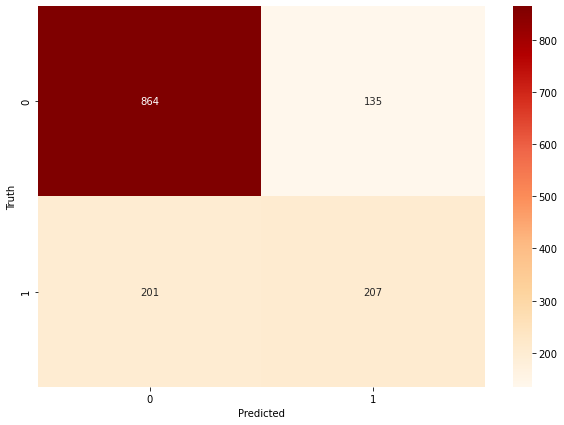

In [58]:
#plotting confusion matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predictions_binary)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap='OrRd')
plt.xlabel('Predicted')
plt.ylabel('Truth')